<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/Ubion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import statsmodels.api as sm
import datetime as dt

In [ ]:
#신규회원마케팅 df
df1 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/1신규회원마케팅.xlsx")

In [ ]:
#장바구니 데이터 
df2_1 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/2-1 1번연계 장바구니.xlsx")
df2_2 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/2-2 2020-10-01 _ 2022-09-30 장바구니 데이터.xlsx")

In [ ]:
#배너 클릭수
df3 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/3 배너 위치별 클릭수.xlsx")

In [ ]:
#로그인 데이터
df4 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/4 2020-10-01 _ 2022-09-30 로그인 데이터.xlsx")

In [ ]:
#게시판 데이터
df5 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/5 게시판 데이터.xlsx")

In [ ]:
#결제 데이터
df6 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/6 2020-10-01 _ 2022-09-30 결제 데이터_230330.xlsx")
df6_t = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/결제데이터 통합.xlsx")

In [ ]:
#2021 상세 매출
df7_1 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/2021년 상세매출_230321.xlsx")
#2022 상세 매출
df7_2 = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/2022년 상세매출_230321.xlsx")

In [ ]:
df7 = pd.concat([df7_1, df7_2], axis=0)

In [ ]:
#통합 데이터
df_sum = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/결제데이터 통합.xlsx")

#EDA

##df1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23578 entries, 0 to 23577
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   가입일      23578 non-null  object  
 1   아이디      23577 non-null  object  
 2   관심자격1    23578 non-null  object  
 3   관심자격2    23578 non-null  object  
 4   관심자격3    23578 non-null  object  
 5   출생년도     23578 non-null  object  
 6   강의결제     23578 non-null  object  
 7   교재결제     23578 non-null  object  
 8   메일수신     23578 non-null  object  
 9   sms수신    23578 non-null  object  
 10  휴면방지기간   23400 non-null  object  
 11  알게된 경로1  23578 non-null  object  
 12  알게된 경로2  23578 non-null  object  
 13  직업       23578 non-null  object  
 14  주소1      23578 non-null  object  
 15  주소2      23578 non-null  object  
 16  주소3      23578 non-null  object  
 17  나이       15784 non-null  category
 18  나이대      15784 non-null  category
dtypes: category(2), object(17)
memory usage: 3.1+ MB


In [ ]:
df1.drop_duplicates(keep="first", inplace=True)

##df4

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332988 entries, 0 to 332987
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   로그인 날짜       332988 non-null  object
 1   아이디          226827 non-null  object
 2   로그인횟수        332988 non-null  int64 
 3   최초로그인시간      332988 non-null  object
 4   마지막 로그인 시간   332988 non-null  object
 5   마지막 사용 IP    332988 non-null  object
 6   마지막 사용 기기정보  332988 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [ ]:
df4.head()

,로그인 날짜,아이디,로그인횟수,최초로그인시간,마지막 로그인 시간,마지막 사용 IP,마지막 사용 기기정보
0,2022-05-27,UBION00030748,1,2022-05-27 03:41:51.120,2022-05-27 03:41:51.120,115.160.113.210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,2022-05-22,UBION00030748,1,2022-05-22 19:33:52.643,2022-05-22 19:33:52.643,115.160.113.210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,2022-05-12,UBION00030748,2,2022-05-12 06:33:14.957,2022-05-12 13:10:11.303,115.160.113.210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,2022-05-11,UBION00030748,1,2022-05-11 22:56:12.390,2022-05-11 22:56:12.390,115.160.113.210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,2022-05-09,UBION00030748,1,2022-05-09 23:23:09.510,2022-05-09 23:23:09.510,115.160.113.210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [ ]:
df4.describe()

,로그인횟수
count,332988.000000
mean,1.514163
std,2.452843
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1259.000000


In [ ]:
df4.columns

Index(['로그인 날짜', '아이디', '로그인횟수', '최초로그인시간', '마지막 로그인 시간', '마지막 사용 IP',
       '마지막 사용 기기정보'],
      dtype='object')

##df6

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99266 entries, 0 to 99265
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     68473 non-null  object
 1   과목코드    99266 non-null  object
 2   과정코드    99266 non-null  object
 3   결제종류    97202 non-null  object
 4   결제일     97874 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
df6.describe()

,아이디,과목코드,과정코드,결제종류,결제일
count,68473,99266,99266,97202,97874
unique,8044,827,52,8,17531
top,UBION00075560,ACRS00001001,80,신용카드,2020-12-25 14:36:10.000
freq,152,1690,19926,72554,49


In [ ]:
df6.head()

,아이디,과목코드,과정코드,결제종류,결제일
0,UBION00079064,ASQS00001001,SQ,신용카드,2022-09-30 23:47:31.923
1,UBION00079064,ASQS00001001,SQ,신용카드,2022-09-30 23:47:31.923
2,UBION00079064,BSQS00001001,SQ,신용카드,2022-09-30 23:47:31.923
3,UBION00079064,BSQS00002001,SQ,신용카드,2022-09-30 23:47:31.923
4,UBION00052712,BSAS00022001,SA,신용카드,2022-09-30 22:17:30.787


##최다 빈도 접속자 트랙킹
: 이탈 기준과 충성고객 기준 설정을 위한

In [ ]:
#결제 내역
payed = df6[df6['아이디'] == "UBION00032809"]
payed.info()
payed["결제일"].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1349 to 33510
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     15 non-null     object
 1   과목코드    15 non-null     object
 2   과정코드    15 non-null     object
 3   결제종류    15 non-null     object
 4   결제일     0 non-null      object
dtypes: object(5)
memory usage: 720.0+ bytes


15

In [ ]:
#결제한 과목
payed["과정코드"].value_counts()

20    7
28    6
03    2
Name: 과정코드, dtype: int64

`

In [ ]:
#접속일 조회
dates = id_login_df[id_login_df["아이디"] == "UBION00032809"]["로그인 날짜"]

for i in dates:
  for j in i:
    print(j)

##세번째 호갱님 트랙킹
(첫번째, 두번째 호갱님은 결제일자가 다 null임!)



In [ ]:
#결제 내역
payed = df6[df6['아이디'] == "UBION00019665"]
payed = payed.reset_index(drop=True)

In [ ]:
#결제한 과목
payed["과정코드"].value_counts()

#04 = CFA

04    21
Name: 과정코드, dtype: int64

In [ ]:
#결제한 과정
payed["과목코드"].value_counts()

A04010003001    1
A04110008001    1
B04S00035001    1
B04S00034001    1
A04S00120001    1
A04S00119001    1
A04S00118001    1
A04S00113001    1
A04S00112001    1
A04S00111001    1
A04110007001    1
A04010004001    1
A04110006001    1
A04110005001    1
A04110004001    1
A04110003001    1
A04110002001    1
A04110001001    1
A04080002001    1
A04010005001    1
B04S00036001    1
Name: 과목코드, dtype: int64

In [ ]:
#과정 검색
name_list = []
i = payed["과목코드"][0]

df7_1.dropna(axis=0,inplace=True)
df7_2.dropna(axis=0,inplace=True)


check = df7_1.reset_index()
check_list = check["상품코드"]
check2 = df7_2.reset_index()
check_list2 = check2["상품코드"]

for i in payed["과목코드"]:
  if i in check_list.unique():
    name = df7_1[df7_1["상품코드"] == f"{i}"]["상품명칭"]
    name_dic = {i : f'{name}'}
    name_list.append(name_dic)
  elif i in check_list2.unique():
    name = df7_2[df7_2["상품코드"] == f"{i}"]["상품명칭"]
    name_dic = {i : f'{name}'}
    name_list.append(name_dic)
  else:
    print(f"{i} is not in")

for i in name_list:
  print(i)

A04S00111001 is not in
A04S00112001 is not in
A04S00113001 is not in
A04S00118001 is not in
A04S00119001 is not in
A04S00120001 is not in
B04S00034001 is not in
B04S00035001 is not in
B04S00036001 is not in
{'A04010003001': '913     pre-course(회계입문)\n936     pre-course(회계입문)\n988     pre-course(회계입문)\n1014    pre-course(회계입문)\n1066    pre-course(회계입문)\n              ...       \n9399    pre-course(회계입문)\n9425    pre-course(회계입문)\n9451    pre-course(회계입문)\n9477    pre-course(회계입문)\n9500    pre-course(회계입문)\nName: 상품명칭, Length: 303, dtype: object'}
{'A04010004001': '914     pre-course (재무관리입문)\n937     pre-course (재무관리입문)\n989     pre-course (재무관리입문)\n1015    pre-course (재무관리입문)\n1067    pre-course (재무관리입문)\n               ...         \n9400    pre-course (재무관리입문)\n9426    pre-course (재무관리입문)\n9452    pre-course (재무관리입문)\n9478    pre-course (재무관리입문)\n9501    pre-course (재무관리입문)\nName: 상품명칭, Length: 303, dtype: object'}
{'A04010005001': '915     pre-course (통계학입문)\n938     pre-course (통계학입

In [ ]:
#접속일자
dates = id_login_df[id_login_df["아이디"] == "UBION00019665"]["로그인 날짜"]
dates = pd.to_datetime(dates[9665])

In [ ]:
# 연도와 월을 추출하여 새로운 DataFrame 생성
date_df = pd.DataFrame({'year': dates.year, 'month': dates.month})

# 연도와 월을 결합하여 'yyyy-mm' 형태의 문자열 Series 생성
ym_series = date_df.apply(lambda x: '{:04d}-{:02d}'.format(x['year'], x['month']), axis=1)

# 각 연/월 별 개수 카운트
counts = ym_series.value_counts().sort_index(key=pd.to_datetime)

2020-10    14
2020-11    21
2020-12    14
2021-01    15
2021-02    25
2021-03     5
2021-04     6
2021-05     2
2021-06    11
2021-07    19
2021-08     2
2021-09     4
2021-10     4
2021-11    17
2021-12    14
2022-01    17
2022-02    10
2022-03    17
2022-04     2
2022-05     7
2022-06    17
2022-07     7
2022-08     9
2022-09    10
dtype: int64

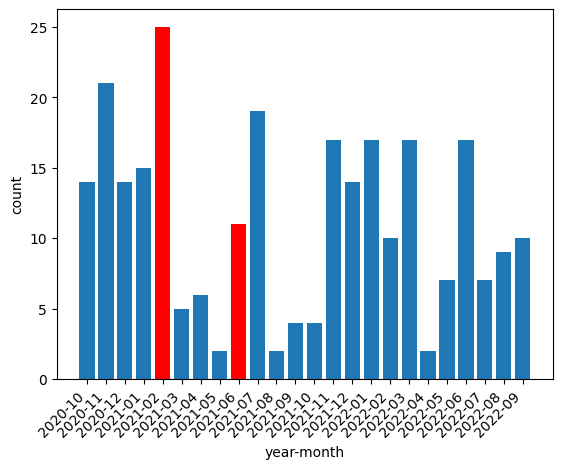

In [ ]:
#접속 분포 확인

# 전체 막대 그리기
plt.bar(counts.index, counts.values)

# 색상을 변경할 막대 인덱스 설정
highlight_idx = ['2021-02', '2021-06']

# 강조할 막대 그리기
plt.bar(highlight_idx, counts.loc[highlight_idx], color='red')

plt.xticks(rotation=45, ha='right')
plt.xlabel('year-month')
plt.ylabel('count')
plt.show()


In [ ]:
#결제일자
payed["결제일"].unique()

array(['2021-02-18 00:25:50.187'], dtype=object)

###이탈 여부

In [ ]:
id_login_date = df4.groupby('아이디')['로그인 날짜'].unique()

In [ ]:
id_login_date

아이디
UBION00000001                            [2022-05-19]
UBION00000002                            [2022-01-27]
UBION00000003                [2021-11-30, 2021-09-23]
UBION00000006                            [2021-06-19]
UBION00000007                            [2021-03-01]
                                 ...                 
UBION00080232    [2021-02-10, 2021-02-09, 2021-02-07]
UBION00080233                            [2020-11-03]
UBION00080236                            [2021-12-01]
UBION00080237    [2021-03-24, 2021-03-15, 2021-03-09]
UBION00080238                            [2021-01-14]
Name: 로그인 날짜, Length: 31316, dtype: object

In [ ]:
# 각 아이디별 마지막 로그인 날짜 계산
id_last_login_date = df4.groupby('아이디')['로그인 날짜'].max().reset_index()

In [ ]:
id_last_login_date.columns = ["아이디", "마지막 로그인 날짜"]

In [ ]:
id_last_login_date

,아이디,마지막 로그인 날짜
0,UBION00000001,2022-05-19
1,UBION00000002,2022-01-27
2,UBION00000003,2021-11-30
3,UBION00000006,2021-06-19
4,UBION00000007,2021-03-01
...,...,...
31311,UBION00080232,2021-02-10
31312,UBION00080233,2020-11-03
31313,UBION00080236,2021-12-01
31314,UBION00080237,2021-03-24


In [ ]:
# '로그인 날짜' 컬럼의 데이터 타입을 datetime으로 변경
df4['로그인 날짜'] = pd.to_datetime(df4['로그인 날짜'])

# 최초 일자와 최종 일자의 차이를 계산
diff_days = (df4['로그인 날짜'].max() - df4['로그인 날짜'].min()).days

# 결과 출력
print('최초 일자와 최종 일자의 차이:', diff_days, '일')

최초 일자와 최종 일자의 차이: 729 일


In [ ]:
id_login_df = pd.DataFrame(id_login_date).reset_index()
id_login_df.head()

,아이디,로그인 날짜
0,UBION00000001,[2022-05-19]
1,UBION00000002,[2022-01-27]
2,UBION00000003,"[2021-11-30, 2021-09-23]"
3,UBION00000006,[2021-06-19]
4,UBION00000007,[2021-03-01]


In [ ]:
id_login_df['이탈여부'] = id_login_df['로그인 날짜'].apply(lambda x: 1 if len(x) <= 3 else 0)

In [ ]:
id_login_df["로그인 날짜"]

16156    [2022-03-29, 2022-01-03, 2022-01-01, 2021-12-2...
16260    [2022-02-10, 2022-02-08, 2022-02-07, 2020-12-1...
9665     [2021-07-31, 2021-07-29, 2020-11-07, 2020-11-0...
8242     [2020-10-07, 2020-10-04, 2021-06-29, 2021-06-2...
11397    [2022-09-10, 2022-09-03, 2022-07-06, 2022-07-0...
                               ...                        
7471                                          [2021-07-10]
7468                                          [2021-12-31]
7467                                          [2021-03-20]
7464                                          [2020-12-18]
31315                                         [2021-01-14]
Name: 로그인 날짜, Length: 31316, dtype: object

In [ ]:
#접속 빈도별 순위
id_login_df["로그인 횟수"] = id_login_df["로그인 날짜"].apply(len)
id_login_df = id_login_df.sort_values(by=["로그인 날짜"], key=lambda x: x.str.len(), ascending=False)
id_login_df.head()

,아이디,로그인 날짜,이탈여부,로그인 횟수
16156,UBION00032809,"[2022-03-29, 2022-01-03, 2022-01-01, 2021-12-2...",0,322
16260,UBION00033040,"[2022-02-10, 2022-02-08, 2022-02-07, 2020-12-1...",0,274
9665,UBION00019665,"[2021-07-31, 2021-07-29, 2020-11-07, 2020-11-0...",0,269
8242,UBION00016833,"[2020-10-07, 2020-10-04, 2021-06-29, 2021-06-2...",0,231
11397,UBION00023152,"[2022-09-10, 2022-09-03, 2022-07-06, 2022-07-0...",0,213


In [ ]:
login_count_df['로그인 횟수'].value_counts()

1      14431
2       4523
3       2153
4       1357
5        962
       ...  
231        1
141        1
119        1
122        1
163        1
Name: 로그인 횟수, Length: 145, dtype: int64

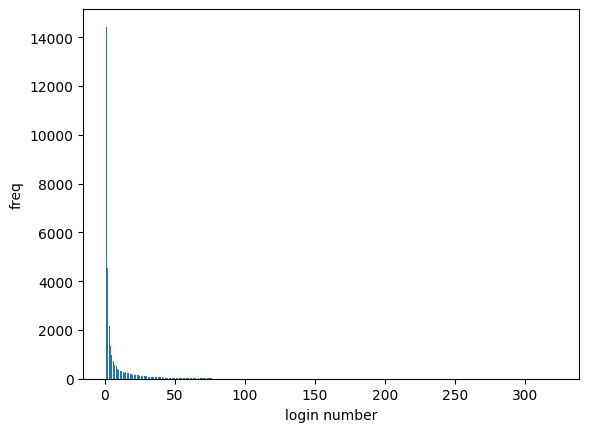

In [ ]:
#접속 빈도 분포
login_count_df = id_login_df.groupby('아이디')['로그인 횟수'].sum().reset_index()
login_count_freq = login_count_df['로그인 횟수'].value_counts()

plt.bar(login_count_freq.index, login_count_freq.values)
plt.xlabel('login number')
plt.ylabel('freq')
plt.show()

#마케팅 퍼널별 고객분류

##인지
: 광고 등에 노출되어 브랜드에 흥미를 갖는 고객

###유입경로



전체기간

In [ ]:
#고객 유입경로 df생성
df_recog = df1[["알게된 경로1", "알게된 경로2"]]

In [ ]:
# 각 시리즈에서 고유한 값의 등장 횟수 확인
counts_1 = df_recog["알게된 경로1"].value_counts()
counts_2 = df_recog["알게된 경로2"].value_counts()

# 두 시리즈에서 모든 고유한 값의 등장 횟수를 더한 결과 확인
results = counts_1.add(counts_2, fill_value=0)

# 결과를 빈도 크기 순으로 정렬
results = results.sort_values(ascending=False)
print(results)

-           44754.0
기타            760.0
네이버           691.0
블로그           206.0
교재구매          149.0
와우패스 수강생      128.0
구글             83.0
다음             71.0
카페             63.0
배너광고           57.0
네이트            49.0
키워드 광고         48.0
지식인            24.0
버스.지하철광고       16.0
타기관 수강생        15.0
인터넷뉴스          13.0
신문뉴스            8.0
전단지             7.0
신문광고            6.0
패밀리사이트          4.0
페이스북            2.0
TV 라디오광고        1.0
TV 라디오방송        1.0
dtype: float64


In [ ]:
results.sum()

47156.0

In [ ]:
47156-44754.0-760.0

1642.0

In [ ]:
1642.0

1642.0

In [ ]:
#네이버 검색량
df_naver = pd.read_excel("/content/drive/MyDrive/데이터분석/유비온/와우패스 데이터/와우패스검색량_naver.xlsx")
df_naver.drop(range(0, 6), inplace=True)
df_naver

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_74b2716f48c87d2e7b5f62460fbc4eac
6,2020-10-01,13.32357
7,2020-10-02,15.61737
8,2020-10-03,15.51976
9,2020-10-04,19.81454
10,2020-10-05,34.60224
...,...,...
731,2022-09-26,20.69302
732,2022-09-27,18.10639
733,2022-09-28,15.61737
734,2022-09-29,15.86139


In [ ]:
df_naver.rename(columns={
    'url': 'date',
    'http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_74b2716f48c87d2e7b5f62460fbc4eac': 'counts'
}, inplace=True)

In [ ]:
df_naver['counts'] = df_naver['counts'].astype(float)  # 실수형으로 변경
search_sum = df_naver["counts"].sum()

In [ ]:
search_join = results["네이버"]/search_sum*100
search_join

4.707667821824341

##관심
: 브랜드에 유입되어 유사 브랜드와 차별점을 비교하는 등 구매를 고려하는 고객

###인구통계학적 특성



연령 : 2030

In [ ]:
df_age = pd.DataFrame()
df_age["birth"] = df1["출생년도"]
df_age["join"] = pd.to_datetime(df1["가입일"])

df_age = df_age.drop(df_age[df_age.birth == '-'].index)
df_age.reset_index()

birth = pd.to_numeric(df_age["birth"], errors='coerce')
join = df_age["join"].dt.year

df_age["age"] = join - birth
df_age['age_group'] = pd.cut(df_age['age'], bins=[0, 19, 29, 39, 49], labels=['10대', '20대', '30대', '40대 이상'])
df_age["age_group"].value_counts()

df1["나이"] = df_age["age"]
df1["나이대"] = df_age["age_group"]

df1["나이대"].value_counts()

20대       8986
30대       4117
40대 이상    1937
10대        744
Name: 나이대, dtype: int64

지역 : 경기도

In [ ]:
df_loc = df1["주소1"]
df_loc.value_counts()

-          22165
경기도          493
부산광역시        151
경상남도         107
인천광역시         97
대구광역시         92
경상북도          74
충청남도          59
광주광역시         53
전라남도          51
대전광역시         48
충청북도          48
전라북도          47
강원도           32
울산광역시         32
세종특별자치시       15
제주특별자치도       14
Name: 주소1, dtype: int64

직업 : 직장인

In [ ]:
988/1360*100

72.6470588235294

직업별 특성

In [ ]:
#df
student = df1[df1["직업"]=="학생"]
worker = df1[df1["직업"]=="직장인"]

In [ ]:
#age
print(student["나이"].value_counts())
print(worker["나이"].value_counts())

24.0    58
25.0    57
23.0    55
22.0    41
26.0    26
21.0    24
20.0    22
27.0    19
28.0    12
18.0    10
17.0     9
30.0     5
16.0     5
19.0     4
15.0     4
33.0     3
35.0     2
29.0     2
52.0     1
40.0     1
39.0     1
47.0     1
31.0     1
49.0     1
62.0     1
58.0     1
Name: 나이, dtype: int64
28.0    48
31.0    45
27.0    45
25.0    41
29.0    41
42.0    39
32.0    39
30.0    38
26.0    34
45.0    31
33.0    30
40.0    30
24.0    28
37.0    27
35.0    27
43.0    27
39.0    26
41.0    26
34.0    26
38.0    25
48.0    25
51.0    22
36.0    21
49.0    20
46.0    19
52.0    18
44.0    17
55.0    16
50.0    15
47.0    14
57.0    13
56.0    13
53.0    10
23.0    10
22.0     7
58.0     6
54.0     6
60.0     5
62.0     5
20.0     4
21.0     3
64.0     2
66.0     2
63.0     1
59.0     1
68.0     1
61.0     1
18.0     1
Name: 나이, dtype: int64


In [ ]:
#관심자격
print(student["관심자격1"].value_counts())
print(worker["관심자격1"].value_counts())

AFPK           55
신용분석사          50
국제무역사 1급       22
CFA            22
투자자산운용사        22
전산세무회계         20
공기업 대비         14
외환전문역 1종       14
사회조사분석사        13
펀드투자권유대행인      10
은행텔러            9
무역영어            8
금융NCS           8
재경관리사           7
AT              7
매경TEST          7
TESAT           7
청소년상담사          7
-               7
자산관리사(은행FP)     7
유통관리사           6
금융DT            6
CFP             6
빅데이터분석기사        5
NCS 직업기초능력      5
물류관리사           3
임상심리사           3
펀드투자권유자문인력      3
경영지도사           3
증권투자권유대행인       2
외환전문역 2종        2
직업상담사           2
증권투자권유자문인력      2
CDCS            2
금융권 대비          2
파생투자권유자문인력      1
사회복지사           1
검색광고마케터         1
면접              1
Name: 관심자격1, dtype: int64
전산세무회계         120
경영지도사          106
신용분석사           89
투자자산운용사         55
파생투자권유자문인력      48
AT              45
재경관리사           37
AFPK            33
펀드투자권유대행인       31
외환전문역 1종        30
CFA             30
은행텔러            29
자산관리사(은행FP)     29
펀드투자권유자문인력      26
국제무역사 

In [ ]:
#지역
print(student["주소1"].value_counts())
print(worker["주소1"].value_counts())

-        113
경기도       82
부산광역시     42
대구광역시     27
경상남도      21
인천광역시     18
광주광역시     12
경상북도      11
강원도       10
전라북도       9
충청북도       8
충청남도       8
대전광역시      6
울산광역시      3
전라남도       2
Name: 주소1, dtype: int64
-          405
경기도        175
부산광역시       52
경상남도        45
경상북도        37
인천광역시       37
전라남도        35
대구광역시       31
전라북도        30
대전광역시       29
충청남도        27
충청북도        27
광주광역시       22
울산광역시       13
강원도          9
세종특별자치시      9
제주특별자치도      5
Name: 주소1, dtype: int64


In [ ]:
#유입경로
print(student["알게된 경로1"].value_counts())
print(worker["알게된 경로1"].value_counts())

네이버         140
-            77
기타           64
교재구매         37
구글           15
와우패스 수강생     14
네이트          11
블로그           8
다음            3
카페            1
키워드 광고        1
타기관 수강생       1
Name: 알게된 경로1, dtype: int64
네이버         300
기타          275
-           170
교재구매         87
구글           50
와우패스 수강생     46
다음           34
네이트          13
배너광고          3
타기관 수강생       3
전단지           2
카페            1
지식인           1
신문광고          1
패밀리사이트        1
신문뉴스          1
Name: 알게된 경로1, dtype: int64


In [ ]:
#결제된 자격
#list
student_list = student["아이디"]
worker_list = worker["아이디"]

#결제자격 확인
print(df6_t[df6_t["아이디"].isin(student_list)]["과목명"].value_counts())
print("////////////////")
print(df6_t[df6_t["아이디"].isin(worker_list)]["과목명"].value_counts())

###장바구니 & 관심자격

In [ ]:
#create df
basket_1 = df2_1.dropna(axis=0).reset_index().drop('index', axis=1)
basket_2 = df2_2.dropna(axis=0).reset_index().drop('index', axis=1)
basket_1.rename(columns={'장바구니 등록일': '등록일'}, inplace=True)
basket_2.rename(columns={'과정코드': '과목'}, inplace=True)
basket_2.rename(columns={'과목코드': '과정'}, inplace=True)
basket_1.rename(columns={'과정코드': '과정'}, inplace=True)
basket_1.rename(columns={'과목코드': '과목'}, inplace=True)

basket = pd.concat([basket_1, basket_2])
basket

,가입일,아이디,과정,과목,등록일
0,2022-09-30 21:45:03.497,UBION00008152,A14S00243001,14,2022-09-30 21:48:11.207
1,2022-09-30 21:45:03.497,UBION00008152,A14S00243001,14,2022-10-08 19:15:27.400
2,2022-09-30 20:54:52.093,UBION00046144,A13S00162001,13,2022-09-30 20:59:44.327
3,2022-09-30 20:54:52.093,UBION00046144,A13S00162001,13,2022-09-30 21:43:51.717
4,2022-09-30 17:22:21.837,UBION00025501,ABCS00003001,BC,2022-09-30 17:24:45.140
...,...,...,...,...,...
20495,NaN,UBION00049190,ACRS00034001,CR,2020-10-01 17:58:17.850
20496,NaN,UBION00012979,A03020014001,03,2020-10-01 17:53:12.533
20497,NaN,UBION00018500,A45S00156001,45,2020-10-01 12:51:33.983
20498,NaN,UBION00006401,A21S00050001,21,2020-10-01 11:41:49.937


과목 : CR(신용분석사)

In [ ]:
basket["과목"].value_counts()

CR    6791
36    2746
40    2732
14    1851
27    1694
04    1663
20    1636
13    1565
05    1485
80    1052
28     845
22     826
SA     798
AT     783
26     703
DT     649
AH     536
37     505
DC     498
06     473
SP     457
03     451
IF     406
IS     361
SQ     328
KB     319
38     306
AB     291
45     284
33     227
DA     185
11     151
CO     136
21     133
DD     113
29      65
BO      55
88      54
BP      51
MD      46
GT      43
81      24
49      23
GU      19
AJ      16
BC      12
AD      11
AR       9
AG       8
08       7
SC       6
IN       5
BD       5
09       2
23       2
65       1
48       1
SE       1
IG       1
Name: 과목, dtype: int64

과정 : ACRS00040001(신용분석사사 정규이론반 예상)

In [ ]:
basket["과정"].value_counts()

ACRS00040001     1009
ACRS00041001      465
A80S01093001      431
BCRS00054001      394
BCRS00049001      389
                 ... 
A37S00073001        1
B27S00115001        1
A08010004001        1
A40S00113001        1
A27S00145001        1
Name: 과정, Length: 1190, dtype: int64

In [ ]:
seek_1 = df7_1.dropna(axis=0)
seek_2 = df7_2.dropna(axis=0)
seek = pd.concat([seek_1, seek_2])

seek[seek['상품코드'].str.contains('ACRS000')]['상품명칭'].value_counts()

[신용분석사] 1부 정규이론반    1184
[신용분석사] 2부 정규이론반    1184
Name: 상품명칭, dtype: int64

###직업별 주요 로그인 시간

In [ ]:
student_time = pd.to_datetime(df4[df4["아이디"].isin(student_list)]["최초로그인시간"])
worker_time = pd.to_datetime(df4[df4["아이디"].isin(worker_list)]["최초로그인시간"])

In [ ]:
student_hour = student_time.dt.hour
worker_hour = worker_time.dt.hour

In [ ]:
student_hour.value_counts()

14    357
21    342
10    340
13    336
11    333
15    333
22    326
20    317
19    303
9     298
12    295
16    284
8     262
17    246
18    227
23    215
7     190
0     186
1      91
6      83
2      57
5      50
4      38
3      26
Name: 최초로그인시간, dtype: int64

<Axes: >

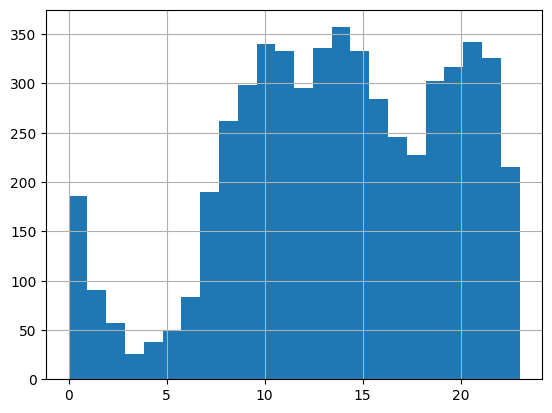

In [ ]:
student_hour.hist(bins=24)

In [ ]:
worker_hour.value_counts()

10    628
13    596
21    595
14    589
22    585
9     563
15    556
11    537
20    528
16    528
12    498
18    449
19    443
17    434
8     416
23    367
0     349
7     301
1     185
6     141
2      99
5      72
4      55
3      54
Name: 최초로그인시간, dtype: int64

<Axes: >

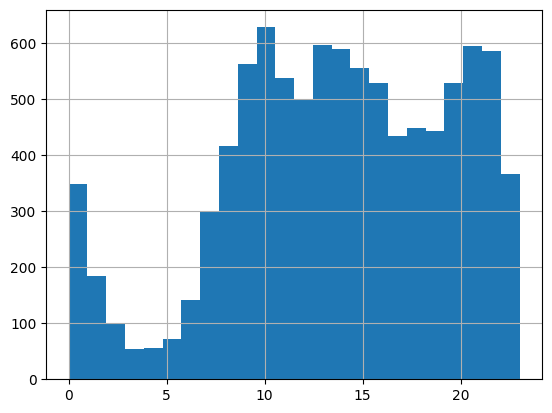

In [ ]:
worker_hour.hist(bins=24)

##전환
: 구매 결정!

자격증별 매출데이터

In [ ]:
#2022년 자격별 매출
ADsP_sales = df7_2[df7_2["과정"]=="ADSP"]["결제금액"].sum()
ADsPed = len(df7_2[df7_2["과정"]=="ADSP"])

DB_sales = df7_2[df7_2["과정"]=="빅데이터분석기사"]["결제금액"].sum()
DBed = len(df7_2[df7_2["과정"]=="빅데이터분석기사"])

SQLD_sales = df7_2[df7_2["과정"]=="SQLD"]["결제금액"].sum()
SQLDed = len(df7_2[df7_2["과정"]=="SQLD"])

ADSP_eff = ADsP_sales/ADsPed
DB_eff = DB_sales/DBed
SQLD_eff = SQLD_sales/SQLDed

print(ADSP_eff)
print(DB_eff)
print(SQLD_eff)

30422.183098591548
29959.789915966387
30806.40668523677


In [ ]:
df7_2["과정"].unique()

array(['증권투자권유자문인력', nan, 'CFA', '은행FP', '은행텔러', '국제무역사 2급', '재경관리사',
       '세무/회계', '파생상품투자권유자문인력', '물류관리사', '펀드투자권유자문인력', '무역영어', '경영지도사',
       '국제무역사 1급', '변액보험판매관리사', 'CDCS', '투자자산운용사', '남영우', '박종철', '손재용',
       '전윤범', 'TEST', '박진영', '유통관리사', '전표훈', '백소라', '외환전문역', '이교수', '손명옥',
       'TESAT', '사회복지사', '노민래', '고동호과정', '금융경제', '은행직무마스터', 'NCS 직업기초능력',
       '김정재', '지규한', '취업적성연구소', '금융NCS Ⅰ종', 'AT', '코딩교육', '데이터분석', '보세사',
       '데이터패키지', '신동민', '정희락', '이성원', '박성택', '신지아', '오명륜', '전산실무',
       '신용분석사', '이창희', '직업상담사', '유선용', '청소년상담사', '임상심리사', '서은주', '이서윤',
       '한채원', '노지영', '금융DT', '지텔프(G-TELP)', '최영준', '케이티', '펀드투자권유대행인',
       '면접', '증권투자권유대행인', '빅데이터분석기사', '마이데이터', '유성준', '이광철', '예자선', '이성영',
       '장준용', '사회조사분석사', '자기소개서', 'ADSP', 'SQLD'], dtype=object)

상품 분포
결제 데이터

In [ ]:
#결제 과목 분포
# 각 시리즈에서 고유한 값의 등장 횟수 확인
counts_1 = df6_t["과목명"].value_counts()
counts_2 = df7_1["과정"].value_counts()
counts_3 = df7_2["과정"].value_counts()

# 두 시리즈에서 모든 고유한 값의 등장 횟수를 더한 결과 확인
results = counts_1.add(counts_2, counts_3, fill_value=0)

# 결과를 빈도 크기 순으로 정렬
results = results.sort_values(ascending=False)
print(results)

NameError: ignored

In [ ]:
#결제 수단 분포
# 각 시리즈에서 고유한 값의 등장 횟수 확인
counts_1 = df6_t["결제종류"].value_counts()
counts_2 = df7_1["결제종류"].value_counts()
counts_3 = df7_2["결제종류"].value_counts()

# 두 시리즈에서 모든 고유한 값의 등장 횟수를 더한 결과 확인
results = counts_1.add(counts_2, counts_3, fill_value=0)

# 결과를 빈도 크기 순으로 정렬
results = results.sort_values(ascending=False)
print(results)

In [ ]:
#연도별 파이썬
for index, value in results.items():
    print(f"{index} {value}")

##충성
: 지속적인 구매

###RFM

In [ ]:
#df 형성
payed_1 = df7_1[["회원ID", '결제일자', "상품수량", "결제종류", "상품코드", "결제금액"]]
payed_2 = df7_2[["회원ID", '결제일자', "상품수량", "결제종류", "상품코드", "결제금액"]]

payed = pd.concat([payed_1, payed_2])
payed.dropna(axis=0, inplace=True)

In [ ]:
#-데이터 삭제
canceled = payed[(payed["결제금액"] < 0)][["회원ID", "상품코드"]]
canceled.reset_index(inplace=True)
canceled.drop('index', axis=1, inplace=True)

payed = payed[~payed[["회원ID", "상품코드"]].isin(canceled.to_dict("list")).all(axis=1)]

In [ ]:
#payed 데이터에서 승인취소 값가진 행들 삭제
payed.drop(payed[payed['결제종류'] == "승인취소"].index.tolist(), axis=0, inplace=True)

#인덱스 재정렬
payed.reset_index(inplace=True)
payed.drop('index', axis=1, inplace=True)

#결제일자 type 변경
payed['결제일자'] = pd.to_datetime(payed['결제일자'])

#회원ID type 변경
payed["회원ID"] = payed["회원ID"].astype(str)

#ID 객체화
grouped = payed.groupby("회원ID")

In [ ]:
# 그룹별 최근 구매일과 오늘 날짜의 차이 계산
now = dt.datetime.today()
recency = grouped['결제일자'].max().apply(lambda x: (now - x).days)

# 그룹별 구매 빈도 계산
frequency = grouped.size()

# 그룹별 총 구매 금액 계산
monetary = grouped["결제금액"].sum()

In [ ]:
rfm_df = pd.DataFrame()
id = []

for name, group in grouped:
  id.append(name)

In [ ]:
rfm_df["id"] = id
rfm_df["r"] = recency.values
rfm_df["f"] = frequency.values
rfm_df["m"] = monetary.values

RFM1

In [ ]:
r_cut = rfm_df['r'].quantile(0.2)
f_cut = rfm_df['f'].quantile(0.8)
m_cut = rfm_df['m'].quantile(0.8)

In [ ]:
def r_score(row):
    if row['r'] < r_cut:
        return 1
    else:
        return 0

rfm_df['r_score'] = rfm_df.apply(r_score, axis=1)

def f_score(row):
    if row['f'] > f_cut:
        return 1
    else:
        return 0

rfm_df['f_score'] = rfm_df.apply(f_score, axis=1)

def m_score(row):
    if row['m'] > m_cut:
        return 1
    else:
        return 0

rfm_df['m_score'] = rfm_df.apply(m_score, axis=1)

In [ ]:
def vip_score(row):
  if row['r_score'] + row['f_score'] + row['m_score'] == 3:
    return 3
  elif row['r_score'] + row['f_score'] + row['m_score'] == 2:
    return 2
  elif row['r_score'] + row['f_score'] + row['m_score'] == 1:
    return 1
  else:
    return 0

rfm_df["vip_score"] = rfm_df.apply(vip_score, axis=1)

In [ ]:
rfm_df["vip_score"].value_counts()

0    6778
1    3494
2    1200
3     329
Name: vip_score, dtype: int64

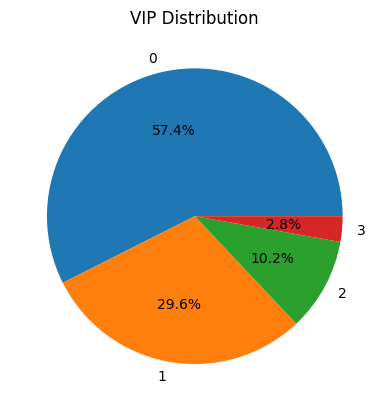

In [ ]:
# 파이 차트 그리기
plt.pie(rfm_df["vip_score"].value_counts(), labels=[0,1,2,3], autopct='%1.1f%%')

# 제목 설정
plt.title('VIP Distribution')

# 그래프 보이기
plt.show()

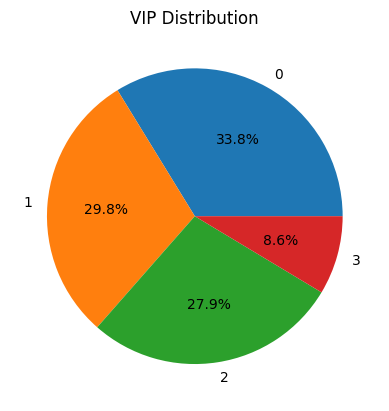

In [ ]:
#계층별 매출 기여도
sales = [
  rfm_df[rfm_df["vip_score"]==0]["m"].sum(),
  rfm_df[rfm_df["vip_score"]==1]["m"].sum(),
  rfm_df[rfm_df["vip_score"]==2]["m"].sum(),
  rfm_df[rfm_df["vip_score"]==3]["m"].sum()
]

# 파이 차트 그리기
plt.pie((sales), labels=[0,1,2,3], autopct='%1.1f%%')

# 제목 설정
plt.title('VIP Distribution')

# 그래프 보이기
plt.show()

In [ ]:
#고객 유형별 id 
pla_list = rfm_df[rfm_df["vip_score"]==3]["id"]
gol_list = rfm_df[rfm_df["vip_score"]==2]["id"]
sil_list = rfm_df[rfm_df["vip_score"]==1]["id"]
bro_list = rfm_df[rfm_df["vip_score"]==0]["id"]

In [ ]:
#고객 유형별 상품 분포
sales = df7
product_pla = sales[sales["회원ID"].isin(pla_list)]["상품명칭"].value_counts()
product_gol = sales[sales["회원ID"].isin(gol_list)]["상품명칭"].value_counts()
product_sil = sales[sales["회원ID"].isin(sil_list)]["상품명칭"].value_counts()
product_bro = sales[sales["회원ID"].isin(bro_list)]["상품명칭"].value_counts()

#고객 유형별 과정 분포
cor_pla = sales[sales["회원ID"].isin(pla_list)]["과정"].value_counts()
cor_gol = sales[sales["회원ID"].isin(gol_list)]["과정"].value_counts()
cor_sil = sales[sales["회원ID"].isin(sil_list)]["과정"].value_counts()
cor_bro = sales[sales["회원ID"].isin(bro_list)]["과정"].value_counts()

In [ ]:
print(cor_pla.head(), '\n')
print(cor_gol.head(), '\n')
print(cor_sil.head(), '\n')
print(cor_bro.head(), '\n')

CFA        2493
신용분석사      1964
외환전문역       434
경영지도사       280
투자자산운용사     256
Name: 과정, dtype: int64 

CFA        9675
신용분석사      5295
경영지도사      2097
AFPK       1397
투자자산운용사     945
Name: 과정, dtype: int64 

AFPK       15820
신용분석사       4797
투자자산운용사     1854
외환전문역       1320
경영지도사       1015
Name: 과정, dtype: int64 

외환전문역           3736
파생상품투자권유자문인력    2956
신용분석사           2882
투자자산운용사         1694
세무/회계           1681
Name: 과정, dtype: int64 



RFM2

In [ ]:
# 각 RFM 값의 분위수를 계산
r_quintiles = pd.qcut(rfm_df['r'], 5, labels=False) + 1
f_quintiles = pd.qcut(rfm_df['f'], 5, labels=False) + 1
m_quintiles = pd.qcut(rfm_df['m'], 5, labels=False) + 1

# 각각 점수로 변환하여 합산
rfm_df['r_score'] = r_quintiles.apply(lambda x: 6 - x)
rfm_df['f_score'] = f_quintiles
rfm_df['m_score'] = m_quintiles

# RFM 점수 계산
rfm_df['rfm_sum'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis=1)

In [ ]:
# 각 rfm 분위의 최소값과 최댓값 출력
for i in range(1, 6):
    r_min = rfm_df[rfm_df['r_score']==i]['r'].min()
    r_max = rfm_df[rfm_df['r_score']==i]['r'].max()
    f_min = rfm_df[rfm_df['f_score']==i]['f'].min()
    f_max = rfm_df[rfm_df['f_score']==i]['f'].max()
    m_min = rfm_df[rfm_df['m_score']==i]['m'].min()
    m_max = rfm_df[rfm_df['m_score']==i]['m'].max()
    print(f"RFM {i} 분위:\n r: {r_min}~{r_max}\n f: {f_min}~{f_max}\n m: {m_min}~{m_max}\n")


RFM 1 분위:
 r: 843~955
 f: 1~2
 m: 0.0~53500.0

RFM 2 분위:
 r: 724~842
 f: 3~3
 m: 54300.0~105000.0

RFM 3 분위:
 r: 564~723
 f: 4~5
 m: 106000.0~179000.0

RFM 4 분위:
 r: 391~563
 f: 6~9
 m: 179100.0~329000.0

RFM 5 분위:
 r: 226~390
 f: 10~99
 m: 330000.0~3318840.0



In [ ]:
def rfm_level(row):
  if  12 < row["rfm_sum"] <= 15:
    return 5
  elif 9 < row["rfm_sum"] <= 12:
    return 4
  elif 6 < row["rfm_sum"] <= 9:
    return 3
  elif 3 < row["rfm_sum"] <= 6:
    return 2
  else:
    return 1
  
rfm_df["rfm_level"] = rfm_df.apply(rfm_level, axis=1)

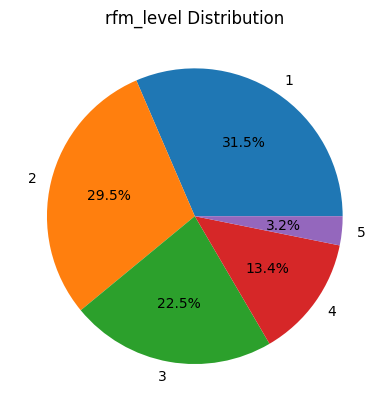

In [ ]:
# 파이 차트 그리기
plt.pie(rfm_df["rfm_level"].value_counts(), labels=[1,2,3,4,5], autopct='%1.1f%%')

# 제목 설정
plt.title('rfm_level Distribution')

# 그래프 보이기
plt.show()

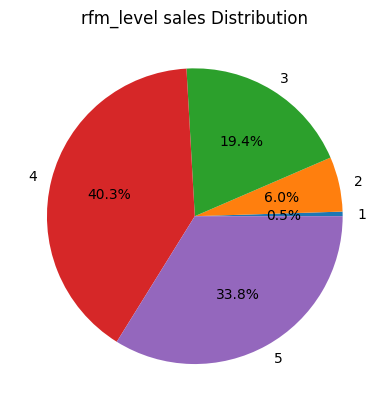

In [ ]:
#계층별 매출 기여도
sales = [
  rfm_df[rfm_df["rfm_level"]==1]["m"].sum(),
  rfm_df[rfm_df["rfm_level"]==2]["m"].sum(),
  rfm_df[rfm_df["rfm_level"]==3]["m"].sum(),
  rfm_df[rfm_df["rfm_level"]==4]["m"].sum(),
  rfm_df[rfm_df["rfm_level"]==5]["m"].sum()
]

# 파이 차트 그리기
plt.pie((sales), labels=[1,2,3,4,5], autopct='%1.1f%%')

# 제목 설정
plt.title('rfm_level sales Distribution')

# 그래프 보이기
plt.show()

In [ ]:
#고객 유형별 id 
pla_list = rfm_df[rfm_df["rfm_level"]==5]["id"]
gol_list = rfm_df[rfm_df["rfm_level"]==4]["id"]
sil_list = rfm_df[rfm_df["rfm_level"]==3]["id"]
bro_list = rfm_df[rfm_df["rfm_level"]==2]["id"]
iro_list = rfm_df[rfm_df["rfm_level"]==1]["id"]

In [ ]:
#고객 유형별 상품 분포
sales = df7
product_pla = sales[sales["회원ID"].isin(pla_list)]["상품명칭"].value_counts()
product_gol = sales[sales["회원ID"].isin(gol_list)]["상품명칭"].value_counts()
product_sil = sales[sales["회원ID"].isin(sil_list)]["상품명칭"].value_counts()
product_bro = sales[sales["회원ID"].isin(bro_list)]["상품명칭"].value_counts()
product_iro = sales[sales["회원ID"].isin(iro_list)]["상품명칭"].value_counts()

#고객 유형별 과정 분포
cor_pla = sales[sales["회원ID"].isin(pla_list)]["과정"].value_counts()
cor_gol = sales[sales["회원ID"].isin(gol_list)]["과정"].value_counts()
cor_sil = sales[sales["회원ID"].isin(sil_list)]["과정"].value_counts()
cor_bro = sales[sales["회원ID"].isin(bro_list)]["과정"].value_counts()
cor_iro = sales[sales["회원ID"].isin(iro_list)]["과정"].value_counts()

In [ ]:
print(cor_pla.head())
print("//////")
print(cor_gol.head())
print("//////")
print(cor_sil.head())
print("//////")
print(cor_bro.head())
print("//////")
print(cor_iro.head())

CFA        6199
신용분석사      4898
투자자산운용사    1358
경영지도사      1350
외환전문역      1054
Name: 과정, dtype: int64
//////
AFPK       8166
신용분석사      3929
CFA        3738
외환전문역      1862
투자자산운용사    1384
Name: 과정, dtype: int64
//////
AFPK            6621
신용분석사           2005
외환전문역           1289
파생상품투자권유자문인력    1100
CFA             1047
Name: 과정, dtype: int64
//////
신용분석사           2910
AFPK            2427
CFA             1426
외환전문역           1041
파생상품투자권유자문인력     892
Name: 과정, dtype: int64
//////
파생상품투자권유자문인력    311
CFA             306
투자자산운용사         171
외환전문역           158
TEST             79
Name: 과정, dtype: int64
